In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from DatasetHandler import DatasetHandler
from findpeaks import findpeaks
import findpeaks
from test_models import *

In [3]:
def enl(img):
    return (np.mean(img)**2)/(np.std(img)**2)

In [216]:
def normalize(s1):
    def reject_outliers_2(data, m=5):
        d = np.abs(data - np.median(data))
        mdev = np.median(d)
        s = d / (mdev if mdev else 1.)
        return data[s < m]  

    d = reject_outliers_2(s1.flatten(), m=5.)
    s1_n = (s1 -  np.min(d))/(np.max(d) -  np.min(d))
    s1_n = np.clip(s1_n, 0.0, 1.0)

    return s1_n.astype(np.float)

## Load amplitude data

In [221]:
#amplitude = np.load('SAR2SAR-GRD-test/test_data/Rennes_26.npy')
amplitude = np.load('SAR2SAR-GRD-test/test_data/DesMoines_21.npy')
#amplitude = np.load('SAR2SAR-GRD-test/test_data/Damoh_21.npy')
print(' Max', amplitude.max(), '\n Min', amplitude.min(), '\n Std', amplitude.std(), '\n Mean', amplitude.mean())

 Max 6711.0 
 Min 7.0 
 Std 37.685721796019635 
 Mean 93.02825207001703


### Get Intensity

In [222]:
intensity = amplitude**2
print(' Max', intensity.max(), '\n Min', intensity.min(), '\n Std', intensity.std(), '\n Mean', intensity.mean())

 Max 45037521.0 
 Min 49.0 
 Std 39541.42848371888 
 Mean 10074.469310489616


### Normalize intensity

In [223]:
norm_intensity = normalize(intensity)
print(' Max', norm_intensity.max(), '\n Min', norm_intensity.min(), '\n Std', norm_intensity.std(), '\n Mean', norm_intensity.mean())

 Max 1.0 
 Min 0.0 
 Std 0.23109404794177296 
 Mean 0.35372069669884726


## Plot data

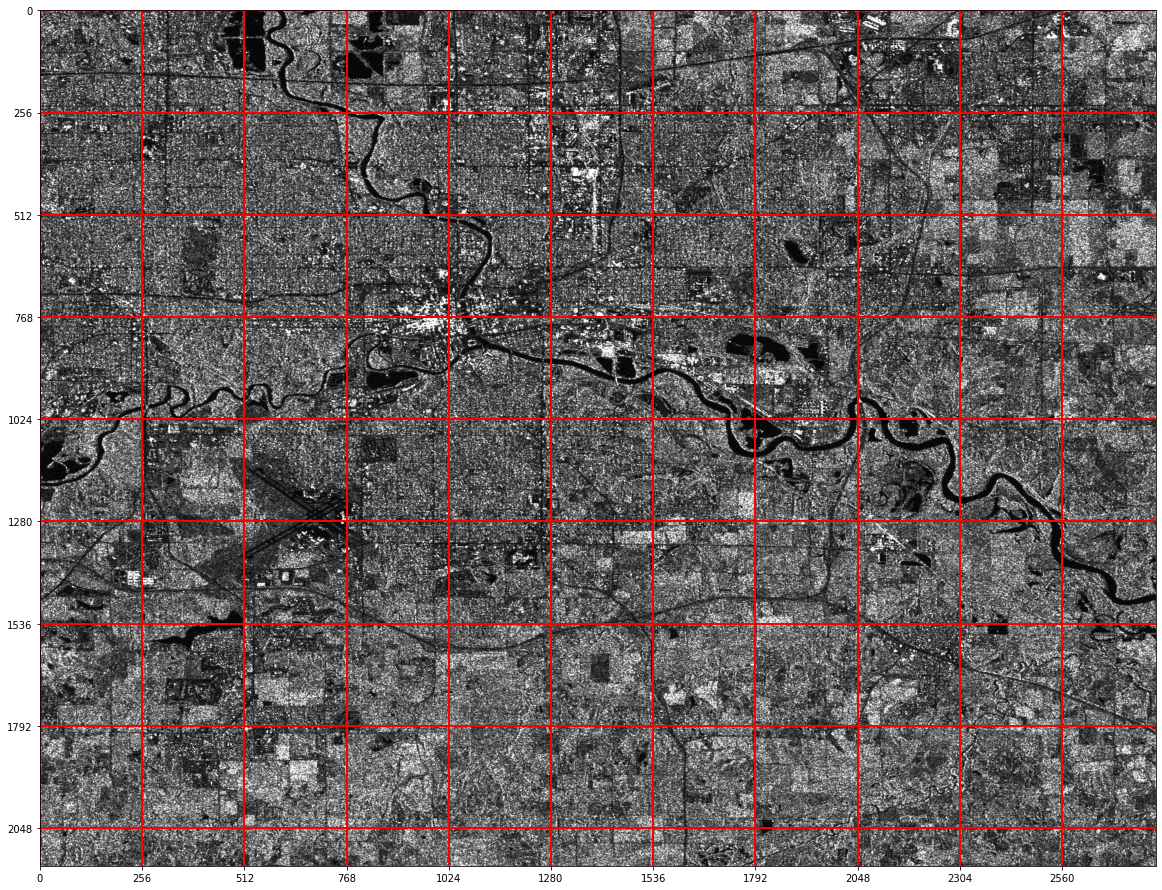

In [224]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,20))
ax.imshow(norm_intensity, cmap ='gray')
#ax.axis(False)
# Major ticks every 20, minor ticks every 5
major_x_ticks = np.arange(0, norm_intensity.shape[1], 256)
major_y_ticks = np.arange(0, norm_intensity.shape[0], 256)

ax.set_xticks(major_x_ticks)
ax.set_yticks(major_y_ticks)

# And a corresponding grid
ax.grid(which='both',color='r', linestyle='-', linewidth=2)
plt.show()

In [ ]:
from Model import CNNSpeckleFilter
from tensorflow.keras.models import load_model

N_LAYER = 12
IMG_SHAPE = (96,96,1)

speckle_filter = CNNSpeckleFilter(input_shape=IMG_SHAPE, n_layers=N_LAYER)
speckle_filter.model = load_model('weights/new_model_'+str(N_LAYER)+'layers.h5')

prediction = np.zeros(norm_intensity.shape)

for i in range(norm_intensity.shape[0]//IMG_SHAPE[0]):
    for j in range(norm_intensity.shape[1]//IMG_SHAPE[1]):
        img = norm_intensity[np.newaxis, i*IMG_SHAPE[0]:(i+1)*IMG_SHAPE[0],j*IMG_SHAPE[1]:(j+1)*IMG_SHAPE[1],np.newaxis]
        prediction[i*IMG_SHAPE[0]:(i+1)*IMG_SHAPE[0],j*IMG_SHAPE[1]:(j+1)*IMG_SHAPE[1]] = speckle_filter.model.predict(img)[0,...,0]

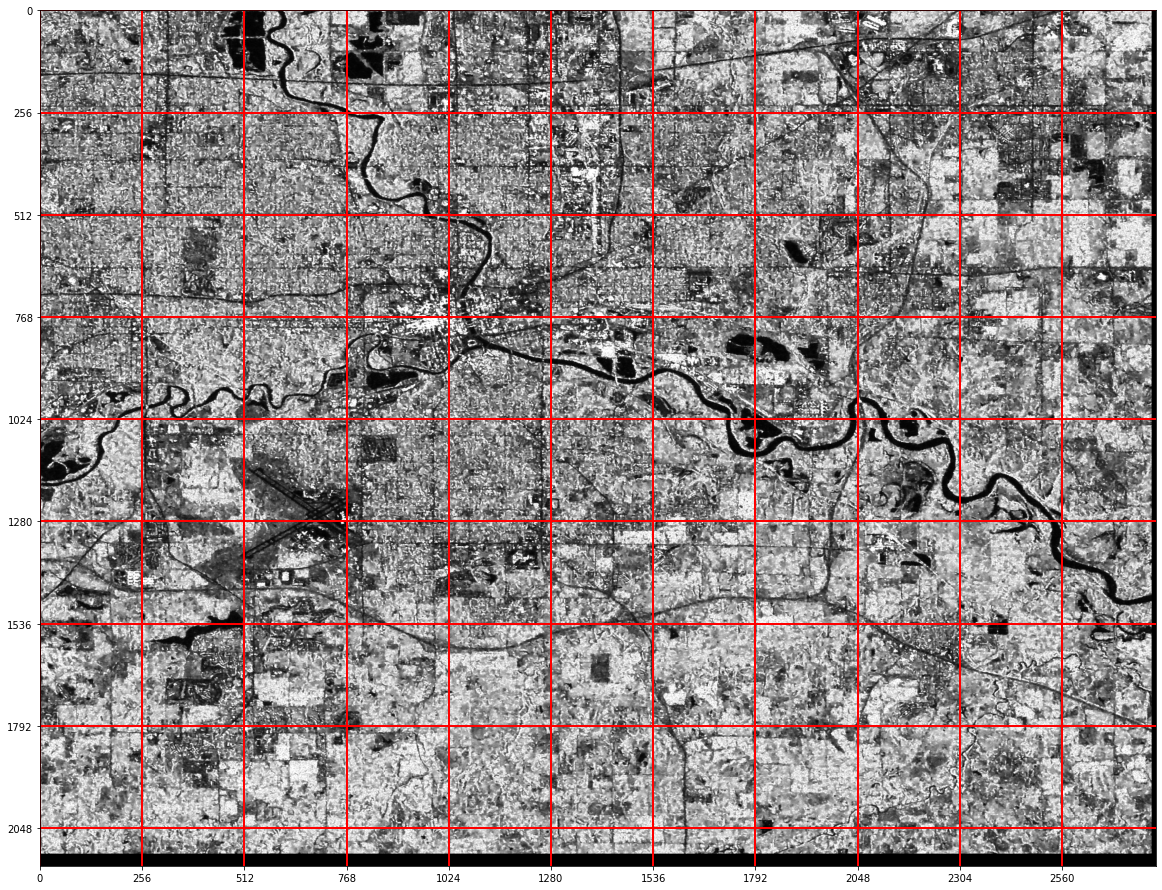

In [232]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,20))
ax.imshow(prediction, cmap ='gray')
#ax.axis(False)
# Major ticks every 20, minor ticks every 5
major_x_ticks = np.arange(0, norm_intensity.shape[1], 256)
major_y_ticks = np.arange(0, norm_intensity.shape[0], 256)

ax.set_xticks(major_x_ticks)
ax.set_yticks(major_y_ticks)

# And a corresponding grid
ax.grid(which='both',color='r', linestyle='-', linewidth=2)
plt.show()

### Extract small patch

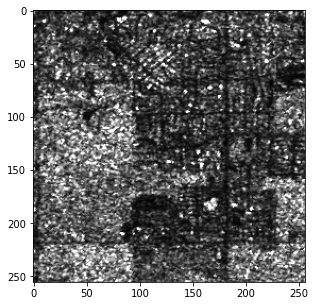

ENL Input 2.488766719683179


In [233]:
starty = 256
stopy  = 512
startx = 2304
spotx  = 2560

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
ax.imshow(norm_intensity[starty:stopy,startx:spotx], cmap ='gray')
plt.show()

print('ENL Input', enl(norm_intensity[start:stop,start:stop]))

# Classic filters

In [234]:
import findpeaks
scaled_norm_intensity = findpeaks.stats.scale(norm_intensity[starty:stopy,startx:spotx])
image_lee, image_lee_enhanced, image_kuan, image_frost, image_mean, image_median, img_fastnl, img_bilateral = test_classic(scaled_norm_intensity)
print('ENL Lee', enl(image_lee))
print('ENL Lee Enahnched', enl(image_lee_enhanced))
print('ENL Kuan', enl(image_kuan))
print('ENL Frost', enl(image_frost))
print('ENL Mean', enl(image_mean))
print('ENL Median', enl(image_median))
print('ENL Fastnl', enl(img_fastnl))
print('ENL Bilateral', enl(img_bilateral))

[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Denoising with [fastnl], window: [3].
[findpeaks] >Denoising with [bilateral], window: [3].
ENL Lee 2.3401299126725505
ENL Lee Enahnched 2.5919656043430863
ENL Kuan 2.367077703652016
ENL Frost 2.433689477061327
ENL Mean 2.5975495781539117
ENL Median 2.3768491563270966
ENL Fastnl 1.9788657281419895
ENL Bilateral 2.5183666287881645


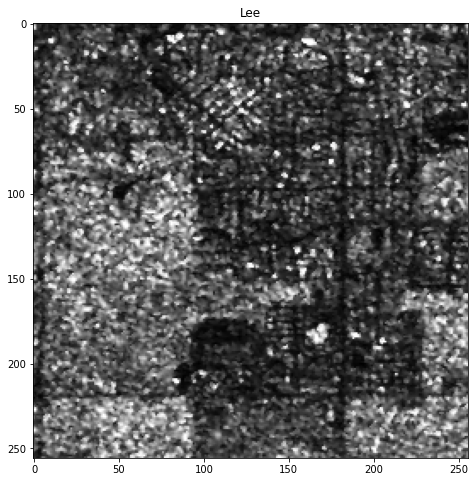

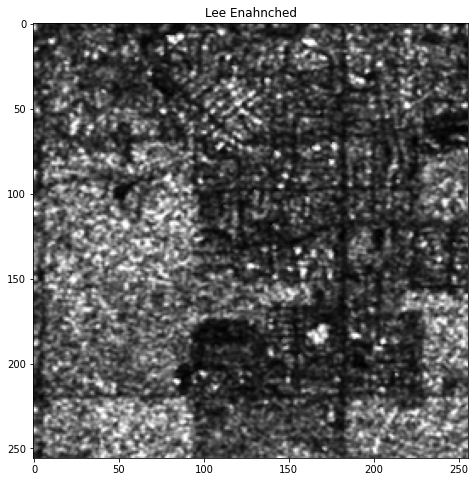

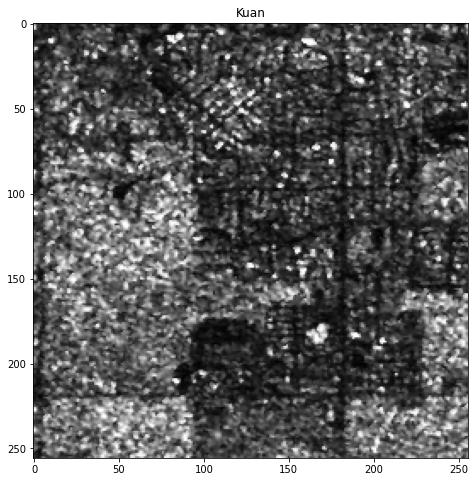

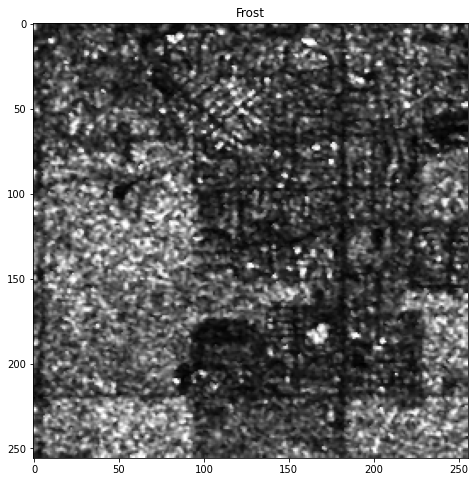

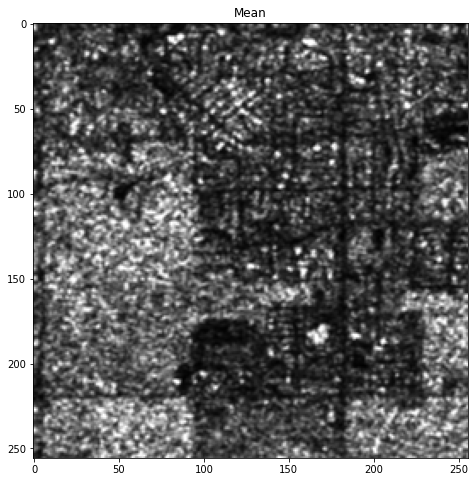

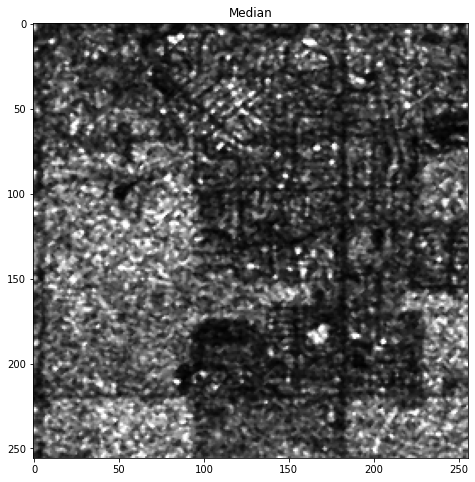

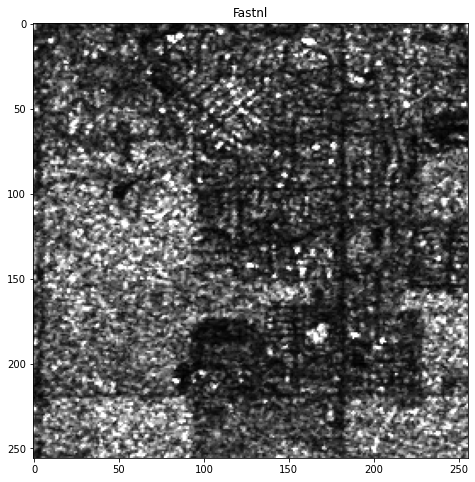

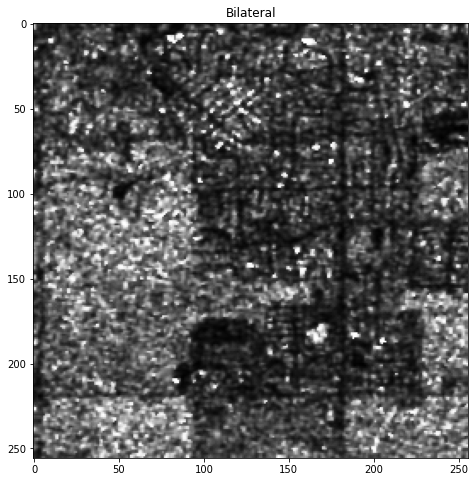

In [285]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ax.imshow(image_lee, cmap ='gray')
ax.set_title('Lee')
plt.show()
plt.close()

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ax.imshow(image_lee_enhanced, cmap ='gray')
ax.set_title('Lee Enahnched')
plt.show()
plt.close()

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ax.imshow(image_kuan, cmap ='gray')
ax.set_title('Kuan')
plt.show()
plt.close()

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ax.imshow(image_frost, cmap ='gray')
ax.set_title('Frost')
plt.show()
plt.close()

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ax.imshow(image_mean, cmap ='gray')
ax.set_title('Mean')
plt.show()
plt.close()

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ax.imshow(image_median, cmap ='gray')
ax.set_title('Median')
plt.show()
plt.close()

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ax.imshow(img_fastnl, cmap ='gray')
ax.set_title('Fastnl')
plt.show()
plt.close()

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ax.imshow(img_bilateral, cmap ='gray')
ax.set_title('Bilateral')
plt.show()
plt.close()

# DnCNN

In [239]:
DnCNN = np.zeros((256,256))

for i in range(4):
    for j in range(4):
        DnCNN[64*i:64*(i+1),64*j:64*(j+1)] = test_DNCNN(findpeaks.stats.scale(norm_intensity[starty+(64*i):starty+(64*(i+1)),startx+(64*j):startx+(64*(j+1)),np.newaxis]))

[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Scaling image between [0-255] and to uint8


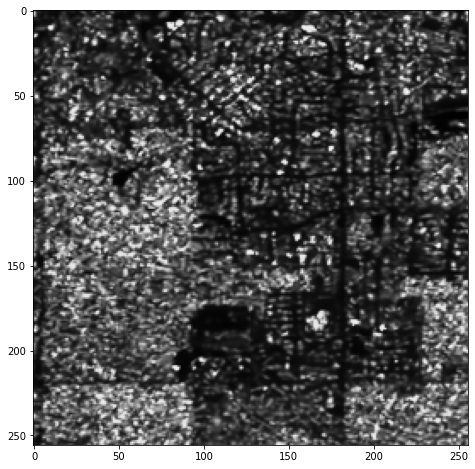

ENL DnCNN 2.0623939329566436


In [286]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ax.imshow(DnCNN, cmap ='gray')
plt.show()

print('ENL DnCNN', enl(DnCNN))

# IDCNN

In [252]:
IDCNN = test_IDCNN(findpeaks.stats.scale(norm_intensity[starty:stopy,startx:spotx]))

[findpeaks] >Scaling image between [0-255] and to uint8


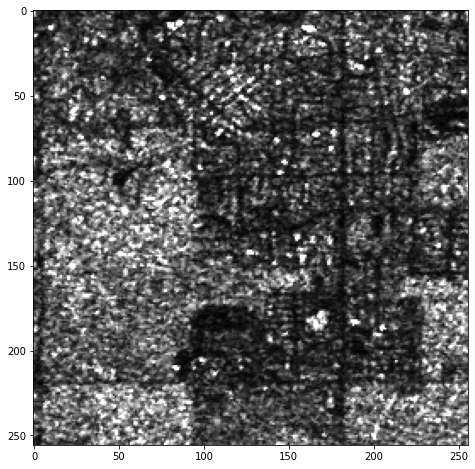

ENL IDCNN 1.9696116132351476


In [287]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ax.imshow(IDCNN, cmap ='gray')
plt.show()

print('ENL IDCNN', enl(IDCNN))

# Proposed

In [254]:
from Model import CNNSpeckleFilter
from tensorflow.keras.models import load_model

N_LAYER = 12
IMG_SHAPE = (96,96,1)

speckle_filter = CNNSpeckleFilter(input_shape=IMG_SHAPE, n_layers=N_LAYER)
speckle_filter.model = load_model('weights/new_model_'+str(N_LAYER)+'layers.h5')

In [255]:
proposed = np.zeros((384,384))

for i in range(4):
    for j in range(4):
        proposed[96*i:96*(i+1),96*j:96*(j+1)] = speckle_filter.model.predict(norm_intensity[np.newaxis, starty-96+(96*i):starty-96+(96*(i+1)),startx-96+(96*j):startx-96+(96*(j+1)),np.newaxis])[0,:,:,0]
        
proposed = proposed[96:-32,96:-32]

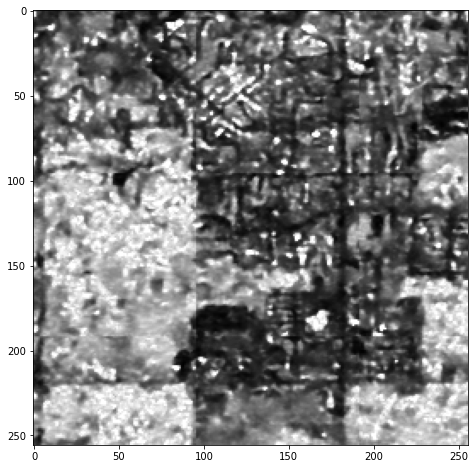

ENL Proposed 3.5359120398432315


In [288]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ax.imshow(proposed, cmap ='gray')
plt.show()

print('ENL Proposed', enl(proposed))

# BM3D

In [263]:
BM3D = test_BM3D(norm_intensity[starty:stopy,startx:spotx])

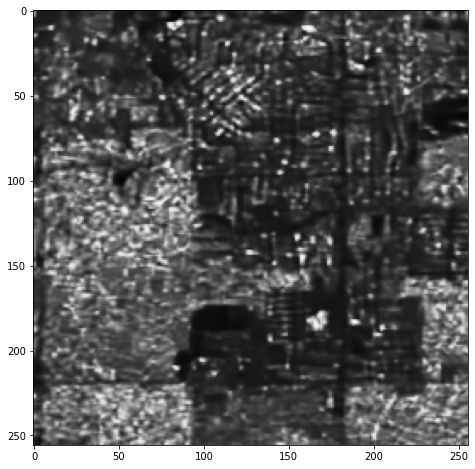

ENL IDCNN 3.3027002219659534


In [289]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ax.imshow(BM3D, cmap ='gray')
plt.show()

print('ENL IDCNN', enl(BM3D))

# SAR-CNN

In [307]:
SARCNN = np.zeros((256,256))

for i in range(4):
    for j in range(4):
        SARCNN[64*i:64*(i+1),64*j:64*(j+1)] = test_SARCNN(norm_intensity[starty+(64*i):starty+(64*(i+1)),startx+(64*j):startx+(64*(j+1)),np.newaxis])

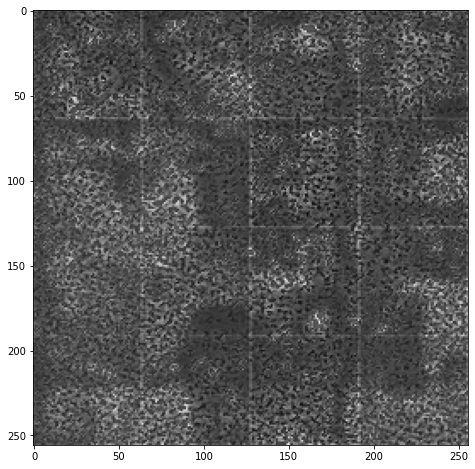

ENL IDCNN 1.5165381752964804


In [308]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ax.imshow(SARCNN, cmap ='gray')
plt.show()

print('ENL IDCNN', enl(SARCNN))

# CNNNLM

In [311]:
CNNNLM = np.zeros((256,256))

for i in range(4):
    for j in range(4):
        CNNNLM[64*i:64*(i+1),64*j:64*(j+1)] = test_CNNNLM(norm_intensity[start+(64*i):start+(64*(i+1)),start+(64*j):start+(64*(j+1)),np.newaxis].astype(float))

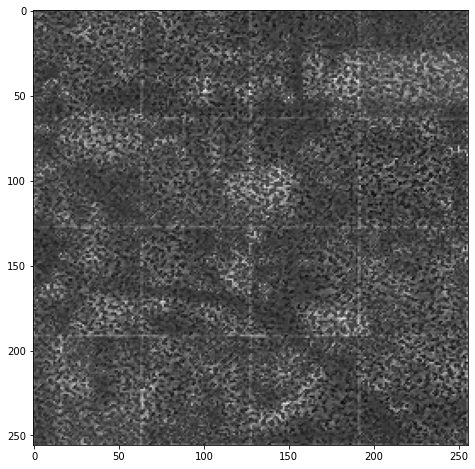

ENL IDCNN 1.7702566519071927


In [312]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ax.imshow(CNNNLM, cmap ='gray')
plt.show()

print('ENL IDCNN', enl(CNNNLM))

# Speckle2Void

In [319]:
s2void = test_speckle2void(norm_intensity[start:stop,start:stop, np.newaxis])

Taking the specified checkpoint...
INFO:tensorflow:Restoring parameters from speckle2void/s2v_checkpoint/model.ckpt-299999


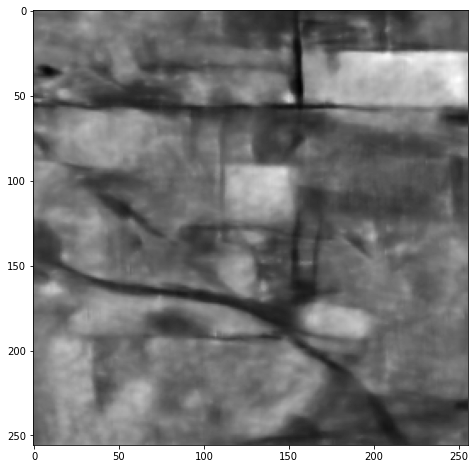

ENL Speckle2Void 11.097090936189328


In [320]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ax.imshow(s2void, cmap ='gray')
plt.show()

print('ENL Speckle2Void', enl(s2void))

# SAR2SAR

In [321]:
SA2SAR = test_SAR2SAR(norm_intensity[start:stop,start:stop, np.newaxis])

[*] Initialize model successfully...
[*] Reading checkpoint...
INFO:tensorflow:Restoring parameters from SAR2SAR-GRD-test/checkpoint/SAR2SAR-tensorflow-101940


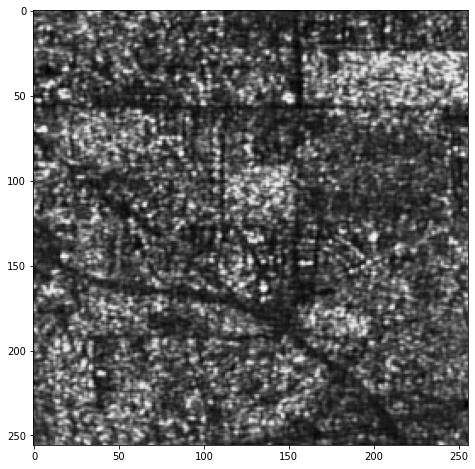

ENL SAR2SAR 3.425193719579219


In [322]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ax.imshow(SA2SAR, cmap ='gray')
plt.show()

print('ENL SAR2SAR', enl(SA2SAR))